In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras

from pandas.plotting import scatter_matrix
from scipy import stats


In [3]:
def load_data(data_dir): 
    return pd.read_csv(data_dir)


In [4]:
def encode_data(cancer_data, cancer_data_column): 
    label_encoder = LabelEncoder()
    return label_encoder.fit_transform(cancer_data[cancer_data_column])



In [13]:
def choose_linear_columns(cancer_data):
    linear_columns = ["RBC", "Haemoglbin", "Platelet_Count"]
    
    return cancer_data[linear_columns]


    RBC  Haemoglbin  Platelet_Count
0  2.25         8.0           244.0
1  2.82         8.9            38.0
2  2.46         7.7            50.0
3  2.51         7.7            16.0
4  3.66        10.2           522.0


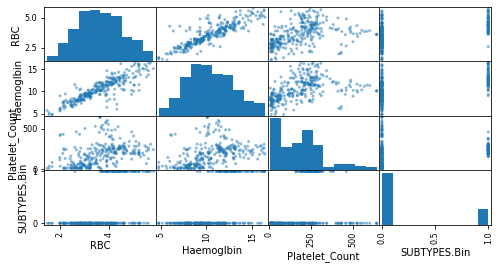

In [14]:
cancer_data = load_data("/home/nadzhou/Downloads/cancer_data.csv")
cancer_data['Gender'] = encode_data(cancer_data, "Gender")
cancer_data['SUBTYPES.Bin'] = encode_data(cancer_data, "SUBTYPES.Bin")

linear_cancer_data = choose_linear_columns(cancer_data)

print(linear_cancer_data.head())

attributes = ["RBC",  "Haemoglbin", "Platelet_Count", "SUBTYPES.Bin"]
scatter_matrix(cancer_data[attributes], figsize=(8, 4))

plt.show()